Importing Data and Packages

In [432]:
import random as rn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [433]:
crashes = pd.read_csv('./Crashes.csv')

C:\Users\thoma\AppData\Local\Temp\ipykernel_10572\3295066010.py:1: DtypeWarning: Columns (17,22,26,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv('./Crashes.csv')


In [434]:
crashes.head()

,X,Y,OBJECTID,CRASH_ID,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_ID,CNTY_NM,...,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_CD,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,1,1724606,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,2,1757545,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3,1765991,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,4,1724862,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,5,1768003,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,26,Multnomah,...,0,0,0,0,5,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2


In [435]:
crashes.columns

Index(['X', 'Y', 'OBJECTID', 'CRASH_ID', 'SER_NO', 'CRASH_DT', 'CRASH_HR_NO',
       'CRASH_HR_LONG_DESC', 'CNTY_ID', 'CNTY_NM',
       ...
       'TOT_PED_INJ_A_CNT', 'TOT_PEDCYCL_INJ_A_CNT', 'TOT_MTRCYCL_FATAL_CNT',
       'TOT_MTRCYCL_INJ_A_CNT', 'HIGHEST_INJ_SVRTY_CD',
       'HIGHEST_INJ_SVRTY_DESC', 'MJ_INVLV_FLG', 'GIS_JURIS',
       'TOT_MTRCYCL_CNT', 'TOT_MOTOR_CNT'],
      dtype='object', length=151)

**Data Cleaning**

In [436]:
#list of all the columns in crashes

crashes_columns = []

for c in crashes.columns:

  crashes_columns. append(c)
  
print(crashes_columns)

['X', 'Y', 'OBJECTID', 'CRASH_ID', 'SER_NO', 'CRASH_DT', 'CRASH_HR_NO', 'CRASH_HR_LONG_DESC', 'CNTY_ID', 'CNTY_NM', 'CITY_SECT_ID', 'CITY_SECT_NM', 'URB_AREA_CD', 'URB_AREA_LONG_NM', 'FC_CD', 'FC_DESC', 'NHS_FLG', 'RTE_ID', 'RTE_NM', 'RTE_TYP_CD', 'HWY_NO', 'HWY_MED_NM', 'HWY_SFX_NO', 'RDWY_NO', 'HWY_COMPNT_CD', 'HWY_COMPNT_LONG_DESC', 'MLGE_TYP_CD', 'MLGE_TYP_LONG_DESC', 'RD_CON_NO', 'MP_NO', 'LRS_VAL', 'LAT_DEG_NO', 'LAT_MINUTE_NO', 'LAT_SEC_NO', 'LONGTD_DEG_NO', 'LONGTD_MINUTE_NO', 'LONGTD_SEC_NO', 'LAT_DD', 'LONGTD_DD', 'SEG_MRK_ID', 'SEG_PT_LRS_MEAS', 'UNLOCT_FLG', 'SPECL_JRSDCT_ID', 'SPECL_JRSDCT_LONG_DESC', 'RECRE_RD_NM', 'ISECT_RECRE_RD_NM', 'AGY_ST_NO', 'ST_FULL_NM', 'ISECT_AGY_ST_NO', 'ISECT_ST_FULL_NM', 'ISECT_SEQ_NO', 'FROM_ISECT_DSTNC_QTY', 'CMPSS_DIR_CD', 'CMPSS_DIR_SHORT_DESC', 'POST_SPEED_LMT_VAL', 'RD_CHAR_CD', 'RD_CHAR_LONG_DESC', 'OFF_RDWY_FLG', 'ISECT_TYP_CD', 'ISECT_TYP_SHORT_DESC', 'RNDABT_FLG', 'ISECT_REL_FLG', 'DRVWY_REL_FLG', 'LN_QTY', 'TURNG_LEG_QTY', 'MEDN_TY

In [437]:
#list of all id columns

id_columns = []

for c in crashes_columns:

  if c[-2:] == "ID":
    id_columns.append(c)
    
print(id_columns)

['OBJECTID', 'CRASH_ID', 'CNTY_ID', 'CITY_SECT_ID', 'RTE_ID', 'SEG_MRK_ID', 'SPECL_JRSDCT_ID', 'REG_ID', 'DIST_ID']


In [438]:
#removing id columns in data
crashes_new = crashes.drop(id_columns, axis=1)

In [439]:
#list of all code columns

cd_columns = []

for c in crashes_columns:

  if c[-2:] == "CD":
    cd_columns.append(c)
    
print(cd_columns)

['URB_AREA_CD', 'FC_CD', 'RTE_TYP_CD', 'HWY_COMPNT_CD', 'MLGE_TYP_CD', 'CMPSS_DIR_CD', 'RD_CHAR_CD', 'ISECT_TYP_CD', 'MEDN_TYP_CD', 'IMPCT_LOC_CD', 'CRASH_TYP_CD', 'COLLIS_TYP_CD', 'CRASH_SVRTY_CD', 'WTHR_COND_CD', 'RD_SURF_COND_CD', 'LGT_COND_CD', 'TRAF_CNTL_DEVICE_CD', 'INVSTG_AGY_CD', 'POP_RNG_CD', 'RD_CNTL_CD', 'CRASH_WK_DAY_CD', 'CRASH_CAUSE_1_CD', 'CRASH_CAUSE_2_CD', 'CRASH_CAUSE_3_CD', 'CRASH_EVNT_1_CD', 'CRASH_EVNT_2_CD', 'CRASH_EVNT_3_CD', 'HIGHEST_INJ_SVRTY_CD']


In [440]:
# Removing cd columns in data

crashes_new = crashes_new.drop(cd_columns, axis=1)
crashes_new

,X,Y,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_NM,CITY_SECT_NM,URB_AREA_LONG_NM,FC_DESC,...,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338983,7656974.314,674482.6578,1441.0,2021/03/29 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338984,7643699.260,677895.3219,6284.0,2021/10/09 08:00:00+00,11,11:00 AM to 11:59 AM,Multnomah,Portland SW,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338985,7869582.191,601144.6653,93787.0,2021/12/09 08:00:00+00,7,07:00 AM to 07:59 AM,Clackamas,NaN,NaN,RURAL PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Unincorporated Clackamas Co.,0,1
338986,7624386.766,676599.4598,674.0,2021/02/26 08:00:00+00,19,07:00 PM to 07:59 PM,Washington,Beaverton,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,Suspected Minor Injury Crash (B),0.0,Beaverton,0,3


In [441]:
crashes_portland = crashes_new.dropna(subset = 'CITY_SECT_NM')
crashes_portland = crashes_portland[crashes_portland['CITY_SECT_NM'].str.contains('Portland')]
crashes_portland

,X,Y,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_NM,CITY_SECT_NM,URB_AREA_LONG_NM,FC_DESC,...,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338977,7629284.997,683380.7277,8041.0,2021/12/11 08:00:00+00,13,01:00 PM to 01:59 PM,Multnomah,Portland W. Burnside,Portland UA,URBAN MINOR ARTERIAL,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338978,7648909.075,684396.3969,5953.0,2021/09/27 08:00:00+00,9,09:00 AM to 09:59 AM,Multnomah,Portland NE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2
338981,7678813.530,703700.9815,2569.0,2021/05/18 08:00:00+00,16,04:00 PM to 04:59 PM,Multnomah,Portland NE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,Possible Injury Crash (C),0.0,Portland,0,2
338983,7656974.314,674482.6578,1441.0,2021/03/29 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),0.0,Portland,0,2


In [442]:
for col in crashes_portland.columns:

    print(col)

X
Y
SER_NO
CRASH_DT
CRASH_HR_NO
CRASH_HR_LONG_DESC
CNTY_NM
CITY_SECT_NM
URB_AREA_LONG_NM
FC_DESC
NHS_FLG
RTE_NM
HWY_NO
HWY_MED_NM
HWY_SFX_NO
RDWY_NO
HWY_COMPNT_LONG_DESC
MLGE_TYP_LONG_DESC
RD_CON_NO
MP_NO
LRS_VAL
LAT_DEG_NO
LAT_MINUTE_NO
LAT_SEC_NO
LONGTD_DEG_NO
LONGTD_MINUTE_NO
LONGTD_SEC_NO
LAT_DD
LONGTD_DD
SEG_PT_LRS_MEAS
UNLOCT_FLG
SPECL_JRSDCT_LONG_DESC
RECRE_RD_NM
ISECT_RECRE_RD_NM
AGY_ST_NO
ST_FULL_NM
ISECT_AGY_ST_NO
ISECT_ST_FULL_NM
ISECT_SEQ_NO
FROM_ISECT_DSTNC_QTY
CMPSS_DIR_SHORT_DESC
POST_SPEED_LMT_VAL
RD_CHAR_LONG_DESC
OFF_RDWY_FLG
ISECT_TYP_SHORT_DESC
RNDABT_FLG
ISECT_REL_FLG
DRVWY_REL_FLG
LN_QTY
TURNG_LEG_QTY
MEDN_TYP_LONG_DESC
CRASH_TYP_LONG_DESC
COLLIS_TYP_LONG_DESC
CRASH_SVRTY_LONG_DESC
WTHR_COND_LONG_DESC
RD_SURF_MED_DESC
LGT_COND_LONG_DESC
TRAF_CNTL_DEVICE_LONG_DESC
TRAF_CNTL_FUNC_FLG
INVSTG_AGY_LONG_DESC
SCHL_ZONE_IND
WRK_ZONE_IND
ALCHL_INVLV_FLG
DRUG_INVLV_FLG
CRASH_SPEED_INVLV_FLG
CRASH_HIT_RUN_FLG
POP_RNG_MED_DESC
RD_CNTL_MED_DESC
TOT_VHCL_CNT
TOT_FATAL_CNT
TOT_I

Making a list of relevant columns:
Gonna want to keep CRASH_WK_DAY_CD

In [443]:
# Removing irrelevant columns:

unused_columns = ['CRASH_DT', 'X', 'Y', 'SER_NO', 'HWY_NO', 'HWY_SFX_NO', 'LRS_VAL', 'AGY_ST_NO', 'ISECT_AGY_ST_NO', 'ISECT_SEQ_NO', 'FROM_ISECT_DSTNC_QTY', 'GIS_PRC_DT', 'NHS_FLG', # Irrelevant Information
                      'CNTY_NM', 'CITY_SECT_NM', 'URB_AREA_LONG_NM', 'CRASH_HR_LONG_DESC', 'POP_RNG_MED_DESC', 'EFFECTV_DT', 'GIS_JURIS', 'RTE_NM', # Redundant Information
                      'LAT_DEG_NO', 'LAT_MINUTE_NO', 'LAT_SEC_NO', 'LONGTD_DEG_NO', 'LONGTD_MINUTE_NO', 'LONGTD_SEC_NO', #Latitude/Longitude
                      'SEG_PT_LRS_MEAS', 'SPECL_JRSDCT_LONG_DESC', 'RECRE_RD_NM', 'ISECT_RECRE_RD_NM', # No values - All missing data
                      'UNLOCT_FLG', 'TRAF_CNTL_FUNC_FLG', 'UGB', 'MPA', 'MLGE_TYP_LONG_DESC', # Flags that have only one value
                      'CRASH_CAUSE_2_LONG_DESC', 'CRASH_CAUSE_3_LONG_DESC', 'CRASH_EVNT_2_LONG_DESC', 'CRASH_EVNT_3_LONG_DESC' # Extraneous crash event descriptions
                      ]

crashes_portland = crashes_portland.drop(unused_columns, axis = 1)

In [444]:
# These are the 77 columns that we will be considering

for col in crashes_portland.columns:

    print(col)

CRASH_HR_NO
FC_DESC
HWY_MED_NM
RDWY_NO
HWY_COMPNT_LONG_DESC
RD_CON_NO
MP_NO
LAT_DD
LONGTD_DD
ST_FULL_NM
ISECT_ST_FULL_NM
CMPSS_DIR_SHORT_DESC
POST_SPEED_LMT_VAL
RD_CHAR_LONG_DESC
OFF_RDWY_FLG
ISECT_TYP_SHORT_DESC
RNDABT_FLG
ISECT_REL_FLG
DRVWY_REL_FLG
LN_QTY
TURNG_LEG_QTY
MEDN_TYP_LONG_DESC
CRASH_TYP_LONG_DESC
COLLIS_TYP_LONG_DESC
CRASH_SVRTY_LONG_DESC
WTHR_COND_LONG_DESC
RD_SURF_MED_DESC
LGT_COND_LONG_DESC
TRAF_CNTL_DEVICE_LONG_DESC
INVSTG_AGY_LONG_DESC
SCHL_ZONE_IND
WRK_ZONE_IND
ALCHL_INVLV_FLG
DRUG_INVLV_FLG
CRASH_SPEED_INVLV_FLG
CRASH_HIT_RUN_FLG
RD_CNTL_MED_DESC
TOT_VHCL_CNT
TOT_FATAL_CNT
TOT_INJ_LVL_A_CNT
TOT_INJ_LVL_B_CNT
TOT_INJ_LVL_C_CNT
TOT_INJ_CNT
TOT_UNINJD_AGE00_04_CNT
TOT_OCCUP_CNT
TOT_UNINJD_PER_CNT
TOT_PED_CNT
TOT_PED_FATAL_CNT
TOT_PED_INJ_CNT
TOT_PEDCYCL_CNT
TOT_PEDCYCL_FATAL_CNT
TOT_PEDCYCL_INJ_CNT
TOT_UNKNWN_CNT
TOT_UNKNWN_FATAL_CNT
TOT_UNKNWN_INJ_CNT
TOT_PER_INVLV_CNT
TOT_SFTY_EQUIP_USED_QTY
TOT_SFTY_EQUIP_UNUSED_QTY
TOT_SFTY_EQUIP_USE_UNKNWN_QTY
CRASH_MO_NO
CRASH_D

Changing Data Types

In [445]:
crashes_portland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150926 entries, 0 to 338984
Data columns (total 74 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_HR_NO                    150926 non-null  int64  
 1   FC_DESC                        150924 non-null  object 
 2   HWY_MED_NM                     57228 non-null   object 
 3   RDWY_NO                        57228 non-null   float64
 4   HWY_COMPNT_LONG_DESC           57228 non-null   object 
 5   RD_CON_NO                      7388 non-null    float64
 6   MP_NO                          57257 non-null   float64
 7   LAT_DD                         150926 non-null  float64
 8   LONGTD_DD                      150926 non-null  float64
 9   ST_FULL_NM                     150872 non-null  object 
 10  ISECT_ST_FULL_NM               149772 non-null  object 
 11  CMPSS_DIR_SHORT_DESC           150926 non-null  object 
 12  POST_SPEED_LMT_VAL             4735

In [446]:
# Columns to convert to categorical

cat_columns = ['CRASH_HR_NO', 'RDWY_NO', 'RD_CON_NO', 'MP_NO', 'OFF_RDWY_FLG', 'RNDABT_FLG', 'ISECT_REL_FLG', 'DRVWY_REL_FLG',
               'SCHL_ZONE_IND', 'WRK_ZONE_IND', 'ALCHL_INVLV_FLG', 'DRUG_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG', 'CRASH_HIT_RUN_FLG',
               'CRASH_MO_NO', 'CRASH_DAY_NO', 'CRASH_YR_NO', 'MJ_INVLV_FLG']

crashes_portland[cat_columns] = crashes_portland[cat_columns].astype('category')

In [447]:
crashes_portland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150926 entries, 0 to 338984
Data columns (total 74 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   CRASH_HR_NO                    150926 non-null  category
 1   FC_DESC                        150924 non-null  object  
 2   HWY_MED_NM                     57228 non-null   object  
 3   RDWY_NO                        57228 non-null   category
 4   HWY_COMPNT_LONG_DESC           57228 non-null   object  
 5   RD_CON_NO                      7388 non-null    category
 6   MP_NO                          57257 non-null   category
 7   LAT_DD                         150926 non-null  float64 
 8   LONGTD_DD                      150926 non-null  float64 
 9   ST_FULL_NM                     150872 non-null  object  
 10  ISECT_ST_FULL_NM               149772 non-null  object  
 11  CMPSS_DIR_SHORT_DESC           150926 non-null  object  
 12  POST_SPEED_LMT_VAL   

EDA and Visualizations

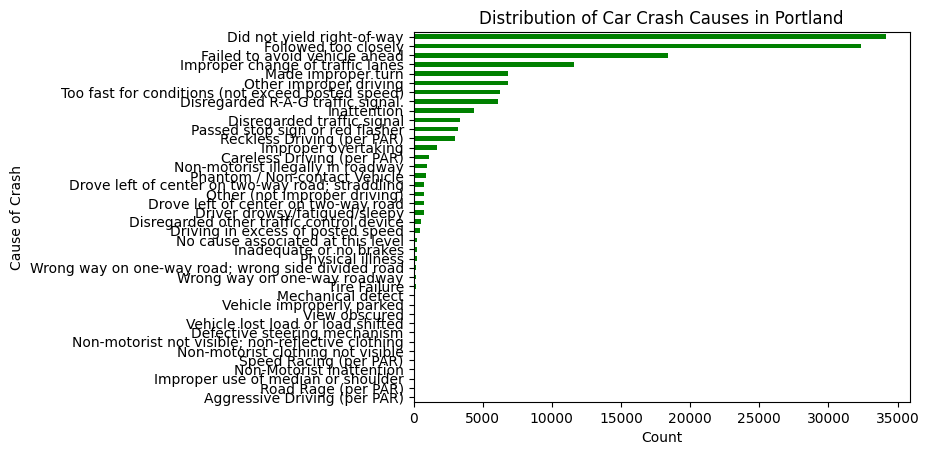

In [448]:
causes = crashes_portland['CRASH_CAUSE_1_LONG_DESC'].value_counts()[::-1]

causes_plot = causes.plot(kind = "barh", color = "green")
plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_10572\1816089627.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = causes_filtered[index], y = index, s = causes_filtered[index], va = "center")


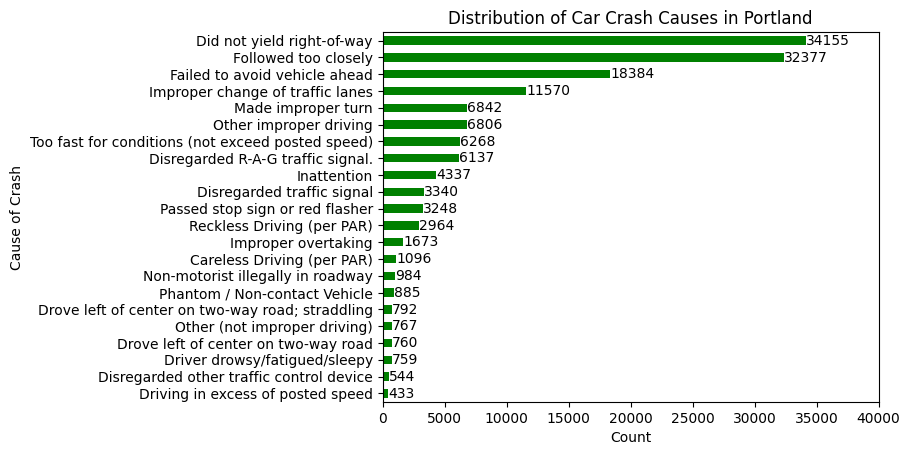

In [449]:
causes_filtered = causes[causes > 300]

causes_plot = causes_filtered.plot(kind = "barh", color = "green")
causes_plot.set_xlim(0, 40000)

# Adding data labels
for index in range(len(causes_filtered)):
    
    plt.text(x = causes_filtered[index], y = index, s = causes_filtered[index], va = "center")

plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

In [450]:
for column in crashes_portland.columns:

    print(crashes_portland[column].value_counts())

CRASH_HR_NO
17    15774
16    13942
15    12962
18    10925
14    10800
13     9539
12     8728
11     7438
8      7353
19     6546
10     6279
9      6145
7      6054
20     4400
21     4237
22     3788
6      3138
23     2919
0      1920
2      1839
1      1582
99     1449
5      1365
3       991
4       813
Name: count, dtype: int64
FC_DESC
URBAN PRINCIPAL ARTERIAL - OTHER                     42854
URBAN MINOR ARTERIAL                                 36495
URBAN PRINCIPAL ARTERIAL - INTERSTATE                25487
URBAN COLLECTOR                                      17270
URBAN LOCAL                                          14677
URBAN MAJOR COLLECTOR                                 9308
URBAN PRINCIPAL ARTERIAL - OTHER FREEWAYS AND EXP     4530
URBAN MINOR COLLECTOR                                  303
Name: count, dtype: int64
HWY_MED_NM
PACIFIC                  11073
EAST PORTLAND FREEWAY     8208
MT. HOOD                  7824
COLUMBIA RIVER            5528
NORTHEAST PORTLAND   

Looking at differences between distributions over time

Looking at ratios of categories to total number of crashes

Fatal crashes
Total number of car crashes over time
Hit and run over time
DRUG_INVLV_FLG
ALCHL_INVLV_FLG
SCHL_ZONE_IND
WRK_ZONE_IND
LGT_COND_LONG_DESC
RD_SURF_MED_DESC
WTHR_COND_LONG_DESC
CRASH_SVRTY_LONG_DESC
POST_SPEED_LMT_VAL
CRASH_HR_NO

Looking at how certain attributes change over time

In [451]:
# Selecting particular columns

distributions = crashes_portland[["CRASH_YR_NO", "CRASH_SVRTY_LONG_DESC", "CRASH_HR_NO", "POST_SPEED_LMT_VAL", "CRASH_HIT_RUN_FLG", "DRUG_INVLV_FLG", "ALCHL_INVLV_FLG", "SCHL_ZONE_IND", "WRK_ZONE_IND", "LGT_COND_LONG_DESC", "RD_SURF_MED_DESC", "WTHR_COND_LONG_DESC"]]

In [452]:
distributions

,CRASH_YR_NO,CRASH_SVRTY_LONG_DESC,CRASH_HR_NO,POST_SPEED_LMT_VAL,CRASH_HIT_RUN_FLG,DRUG_INVLV_FLG,ALCHL_INVLV_FLG,SCHL_ZONE_IND,WRK_ZONE_IND,LGT_COND_LONG_DESC,RD_SURF_MED_DESC,WTHR_COND_LONG_DESC
0,2017,Property Damage Only,15,55.0,0,0,0,NaN,NaN,Daylight,Dry,Clear
1,2017,Property Damage Only,7,NaN,0,0,0,NaN,NaN,Daylight,Unknown,Unknown
2,2017,Property Damage Only,17,35.0,0,0,0,NaN,NaN,Daylight,Dry,Clear
3,2017,Property Damage Only,15,55.0,0,0,0,NaN,NaN,Daylight,Dry,Clear
4,2017,Property Damage Only,8,35.0,0,0,0,NaN,NaN,Daylight,Wet,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...
338977,2021,Property Damage Only,13,NaN,0,0,0,NaN,NaN,Daylight,Unknown,Unknown
338978,2021,Property Damage Only,9,NaN,0,0,0,NaN,NaN,Daylight,Wet,Rain
338981,2021,Non-Fatal Injury,16,55.0,0,0,0,NaN,NaN,Daylight,Dry,Clear
338983,2021,Property Damage Only,17,30.0,0,0,0,NaN,NaN,Daylight,Dry,Clear


Proportion of Fatal Crashes By Category

In [453]:
# Generating plots of the proportion of fatal crashes by feature in the data.

# Initializing color variables
count = 0
random_hex_colors = ['#' + ''.join(rn.choices('0123456789ABCDEF', k=6)) for _ in range(80)]
"""
for column in crashes_portland.drop(columns = ['LAT_DD', 'LONGTD_DD', 'MP_NO', 'ST_FULL_NM', 'ISECT_ST_FULL_NM']).columns: # Dropping columns that have too many unique categories/numeric variables

    ct = 100 * pd.crosstab(crashes_portland['CRASH_SVRTY_LONG_DESC'], crashes_portland[column], normalize = 'columns')
    ct_fatal = ct[:1].T # Grabbing the first row (fatal crashes) and transposing for visualization

    plt.figure(figsize = (10, 5))
    plt.barh([str(name) for name in ct_fatal.index], ct_fatal['Fatal'], color = random_hex_colors[count])

    plt.xlabel("Percentage Fatal Crashes")
    plt.ylabel(column)
    plt.title(f"Proportion of Fatal Crashes by {column}")

    # Saving/Showing the plot
    #plt.tight_layout()
    #plt.savefig(f"Fatal Crash Proportions//{column}.jpg")
    #plt.show()

    count += 1"""

'\nfor column in crashes_portland.drop(columns = [\'LAT_DD\', \'LONGTD_DD\', \'MP_NO\', \'ST_FULL_NM\', \'ISECT_ST_FULL_NM\']).columns: # Dropping columns that have too many unique categories/numeric variables\n\n    ct = 100 * pd.crosstab(crashes_portland[\'CRASH_SVRTY_LONG_DESC\'], crashes_portland[column], normalize = \'columns\')\n    ct_fatal = ct[:1].T # Grabbing the first row (fatal crashes) and transposing for visualization\n\n    plt.figure(figsize = (10, 5))\n    plt.barh([str(name) for name in ct_fatal.index], ct_fatal[\'Fatal\'], color = random_hex_colors[count])\n\n    plt.xlabel("Percentage Fatal Crashes")\n    plt.ylabel(column)\n    plt.title(f"Proportion of Fatal Crashes by {column}")\n\n    # Saving/Showing the plot\n    #plt.tight_layout()\n    #plt.savefig(f"Fatal Crash Proportions//{column}.jpg")\n    #plt.show()\n\n    count += 1'

Attempt at Feature Selection for Fatal Crashes

In [454]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creating copy of the dataset to perform further data transformation on it
chi2_crashes = crashes_portland.copy()

# Creating binary column for crash severity; 1 = Fatal, 0 = Nonfatal
chi2_crashes['FATAL'] = chi2_crashes['CRASH_SVRTY_LONG_DESC'] == "Fatal"

# Imputing numeric data
numeric_columns = ['POST_SPEED_LMT_VAL', 'LN_QTY', 'TURNG_LEG_QTY', 'TOT_VHCL_CNT', 'TOT_FATAL_CNT', 'TOT_INJ_LVL_A_CNT', 'TOT_INJ_LVL_B_CNT',
                    'TOT_INJ_LVL_C_CNT', 'TOT_INJ_CNT', 'TOT_UNINJD_AGE00_04_CNT', 'TOT_OCCUP_CNT', 'TOT_UNINJD_PER_CNT', 'TOT_PED_CNT',
                    'TOT_PED_FATAL_CNT', 'TOT_PED_INJ_CNT', 'TOT_PEDCYCL_CNT', 'TOT_PEDCYCL_FATAL_CNT', 'TOT_PEDCYCL_INJ_CNT', 'TOT_UNKNWN_CNT',
                    'TOT_UNKNWN_FATAL_CNT', 'TOT_UNKNWN_INJ_CNT', 'TOT_PER_INVLV_CNT', 'TOT_SFTY_EQUIP_USED_QTY', 'TOT_SFTY_EQUIP_UNUSED_QTY',
                    'TOT_SFTY_EQUIP_USE_UNKNWN_QTY', 'TOT_MOTOR_FATAL', 'TOT_MOTOR_INJ_A', 'TOT_PED_INJ_A_CNT', 'TOT_PEDCYCL_INJ_A_CNT',
                    'TOT_MTRCYCL_FATAL_CNT', 'TOT_MTRCYCL_INJ_A_CNT', 'TOT_MTRCYCL_CNT', 'TOT_MOTOR_CNT']
categorical_columns = ['CRASH_HR_NO', 'FC_DESC', 'HWY_MED_NM', 'RDWY_NO', 'HWY_COMPNT_LONG_DESC', 'RD_CON_NO', 'MP_NO', 'ST_FULL_NM',
                        'ISECT_ST_FULL_NM', 'CMPSS_DIR_SHORT_DESC', 'RD_CHAR_LONG_DESC', 'OFF_RDWY_FLG', 'ISECT_TYP_SHORT_DESC', 'RNDABT_FLG',
                        'ISECT_REL_FLG', 'DRVWY_REL_FLG', 'MEDN_TYP_LONG_DESC', 'CRASH_TYP_LONG_DESC', 'COLLIS_TYP_LONG_DESC',
                        'WTHR_COND_LONG_DESC', 'RD_SURF_MED_DESC', 'LGT_COND_LONG_DESC', 'TRAF_CNTL_DEVICE_LONG_DESC',
                        'INVSTG_AGY_LONG_DESC', 'SCHL_ZONE_IND', 'WRK_ZONE_IND', 'ALCHL_INVLV_FLG', 'DRUG_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG',
                        'CRASH_HIT_RUN_FLG', 'RD_CNTL_MED_DESC', 'CRASH_MO_NO', 'CRASH_DAY_NO', 'CRASH_YR_NO', 'CRASH_CAUSE_1_LONG_DESC',
                        'CRASH_EVNT_1_LONG_DESC', 'HIGHEST_INJ_SVRTY_DESC', 'MJ_INVLV_FLG',]
chi2_crashes[numeric_columns] = chi2_crashes[numeric_columns].fillna(chi2_crashes[numeric_columns].median())


In [455]:
# Defining target and feature data
X = chi2_crashes.drop(["FATAL", "CRASH_SVRTY_LONG_DESC"], axis = 1)
y = chi2_crashes['FATAL']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', KBinsDiscretizer(n_bins = 200, encode = 'ordinal'), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(chi2, k = 15))  # You can specify the desired number of features (k)
])

pipeline.fit(X, y)
X_transformed = pipeline.transform(X)

selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices = True)
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\thoma\A

NOTE:  Write code to extract features in order...

Examining Outputs

In [456]:
print(len(transformed_feature_names)) # Number of features considered - Many are unique values from the one hot encoding
print(selected_feature_indices) # These are the indices of features considered most important when looking at fatal car crashes
print(X_transformed.shape) # This is the shape of the transformed data - Rows are the crashes, then the k selected columns

for i in selected_feature_indices:

    print(transformed_feature_names[i])

10622
[   12    23    31 10266 10275 10283 10341 10350 10354 10359 10361 10363
 10434 10449 10613]
(150926, 15)
numeric__TOT_PED_CNT
numeric__TOT_SFTY_EQUIP_UNUSED_QTY
numeric__TOT_MTRCYCL_CNT
categorical__CRASH_TYP_LONG_DESC_Pedestrian
categorical__COLLIS_TYP_LONG_DESC_Pedestrian
categorical__WTHR_COND_LONG_DESC_Cloudy
categorical__INVSTG_AGY_LONG_DESC_City Police - Report received
categorical__SCHL_ZONE_IND_0.0
categorical__WRK_ZONE_IND_0.0
categorical__ALCHL_INVLV_FLG_1
categorical__DRUG_INVLV_FLG_1
categorical__CRASH_SPEED_INVLV_FLG_1
categorical__CRASH_CAUSE_1_LONG_DESC_Driving in excess of posted speed
categorical__CRASH_CAUSE_1_LONG_DESC_Non-motorist illegally in roadway
categorical__HIGHEST_INJ_SVRTY_DESC_Fatal Injury (K)


Note:  Driving in excess of posted speed correlates the most with fatal car crashes according to this feature selection, but there are only 433 crashes that had this listed as the crash cause.  I want to look at the table that involves both of those, and also if it correlates with alcohol/drug related crashes, too.

In [457]:
fatal_crashes = crashes_portland[crashes_portland['CRASH_SVRTY_LONG_DESC'] == 'Fatal']

ct = 100 * pd.crosstab(crashes_portland['CRASH_SVRTY_LONG_DESC'], crashes_portland['CRASH_CAUSE_1_LONG_DESC'], normalize = 'columns')
ct

CRASH_CAUSE_1_LONG_DESC,Aggressive Driving (per PAR),Careless Driving (per PAR),Defective steering mechanism,Did not yield right-of-way,Disregarded R-A-G traffic signal.,Disregarded other traffic control device,Disregarded traffic signal,Driver drowsy/fatigued/sleepy,Driving in excess of posted speed,Drove left of center on two-way road,...,Reckless Driving (per PAR),Road Rage (per PAR),Speed Racing (per PAR),Tire Failure,Too fast for conditions (not exceed posted speed),Vehicle improperly parked,Vehicle lost load or load shifted,View obscured,Wrong way on one-way road; wrong side divided road,Wrong way on one-way roadway
CRASH_SVRTY_LONG_DESC,,,,,,,,,,,,,,,,,,,,,
Fatal,0.0,0.456204,1.587302,0.278144,0.211830,0.551471,0.838323,0.395257,19.168591,1.578947,...,1.147099,0.000000,25.0,0.653595,0.957243,0.0,0.000000,0.00,3.5,1.063830
Non-Fatal Injury,25.0,68.978102,52.380952,50.847606,51.523546,36.029412,59.311377,48.880105,54.272517,44.736842,...,51.990553,66.666667,55.0,33.986928,45.740268,35.0,28.378378,53.75,64.5,59.574468
Property Damage Only,75.0,30.565693,46.031746,48.874250,48.264624,63.419118,39.850299,50.724638,26.558891,53.684211,...,46.862348,33.333333,20.0,65.359477,53.302489,65.0,71.621622,46.25,32.0,39.361702


19.17 percent of crashes that happened as a result of driving in excess speeds were fatal.

In [458]:
ct = 100 * pd.crosstab(crashes_portland['ALCHL_INVLV_FLG'], crashes_portland['DRUG_INVLV_FLG'], normalize = 'columns')
print(ct)
ct = 100 * pd.crosstab(crashes_portland['DRUG_INVLV_FLG'], crashes_portland['ALCHL_INVLV_FLG'], normalize = 'columns')
print(ct)

DRUG_INVLV_FLG           0         1
ALCHL_INVLV_FLG                     
0                96.210609  53.09973
1                 3.789391  46.90027
ALCHL_INVLV_FLG          0          1
DRUG_INVLV_FLG                       
0                99.591645  91.579287
1                 0.408355   8.420713


When there was drug involvement in the crash, 46.9% also had alcohol involved
When there was alcohol involvement in the crash, 8.4% also had drugs involved

Focus on why this model is useful, tell a story...

Looking at trends over the past five years of fatal crashes

numeric_columns = ['POST_SPEED_LMT_VAL', 'LN_QTY', 'TURNG_LEG_QTY', 'TOT_VHCL_CNT', 'TOT_FATAL_CNT', 'TOT_INJ_LVL_A_CNT', 'TOT_INJ_LVL_B_CNT',
                    'TOT_INJ_LVL_C_CNT', 'TOT_INJ_CNT', 'TOT_UNINJD_AGE00_04_CNT', 'TOT_OCCUP_CNT', 'TOT_UNINJD_PER_CNT', 'TOT_PED_CNT',
                    'TOT_PED_FATAL_CNT', 'TOT_PED_INJ_CNT', 'TOT_PEDCYCL_CNT', 'TOT_PEDCYCL_FATAL_CNT', 'TOT_PEDCYCL_INJ_CNT', 'TOT_UNKNWN_CNT',
                    'TOT_UNKNWN_FATAL_CNT', 'TOT_UNKNWN_INJ_CNT', 'TOT_PER_INVLV_CNT', 'TOT_SFTY_EQUIP_USED_QTY', 'TOT_SFTY_EQUIP_UNUSED_QTY',
                    'TOT_SFTY_EQUIP_USE_UNKNWN_QTY', 'TOT_MOTOR_FATAL', 'TOT_MOTOR_INJ_A', 'TOT_PED_INJ_A_CNT', 'TOT_PEDCYCL_INJ_A_CNT',
                    'TOT_MTRCYCL_FATAL_CNT', 'TOT_MTRCYCL_INJ_A_CNT', 'TOT_MTRCYCL_CNT', 'TOT_MOTOR_CNT']
categorical_columns = ['CRASH_HR_NO', 'FC_DESC', 'HWY_MED_NM', 'RDWY_NO', 'HWY_COMPNT_LONG_DESC', 'RD_CON_NO', 'MP_NO', 'ST_FULL_NM',
                        'ISECT_ST_FULL_NM', 'CMPSS_DIR_SHORT_DESC', 'RD_CHAR_LONG_DESC', 'OFF_RDWY_FLG', 'ISECT_TYP_SHORT_DESC', 'RNDABT_FLG',
                        'ISECT_REL_FLG', 'DRVWY_REL_FLG', 'MEDN_TYP_LONG_DESC', 'CRASH_TYP_LONG_DESC', 'COLLIS_TYP_LONG_DESC',
                        'WTHR_COND_LONG_DESC', 'RD_SURF_MED_DESC', 'LGT_COND_LONG_DESC', 'TRAF_CNTL_DEVICE_LONG_DESC',
                        'INVSTG_AGY_LONG_DESC', 'SCHL_ZONE_IND', 'WRK_ZONE_IND', 'ALCHL_INVLV_FLG', 'DRUG_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG',
                        'CRASH_HIT_RUN_FLG', 'RD_CNTL_MED_DESC', 'CRASH_MO_NO', 'CRASH_DAY_NO', 'CRASH_YR_NO', 'CRASH_CAUSE_1_LONG_DESC',
                        'CRASH_EVNT_1_LONG_DESC', 'HIGHEST_INJ_SVRTY_DESC', 'MJ_INVLV_FLG',]

In [459]:
fatal_crashes = crashes_portland[crashes_portland['CRASH_SVRTY_LONG_DESC'] == 'Fatal']
fatal_crashes = fatal_crashes[fatal_crashes['CRASH_YR_NO'].isin(range(2017, 2022))]

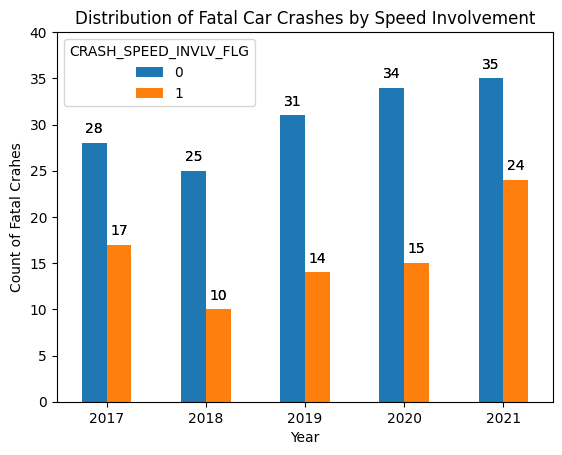

In [460]:
# Crash Causes

fatal_causes = pd.crosstab(fatal_crashes['CRASH_YR_NO'], fatal_crashes['CRASH_SPEED_INVLV_FLG'])

fatal_causes_plot = fatal_causes.plot(kind = "bar", rot = 0)
fatal_causes_plot.set_ylim(0, 40)

# Adding data labels
for p in fatal_causes_plot.patches:
    
    fatal_causes_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    fatal_causes_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Year")
plt.ylabel("Count of Fatal Crahes")
plt.title("Distribution of Fatal Car Crashes by Speed Involvement")
plt.show()

In [466]:
fatal_causes['Involvement Ratio'] = fatal_causes[1] /  fatal_causes.sum(axis=1)
fatal_causes

CRASH_SPEED_INVLV_FLG,0,1,Involvement Ratio
CRASH_YR_NO,,,
2017,28,17,0.374563
2018,25,10,0.283286
2019,31,14,0.308904
2020,34,15,0.304162
2021,35,24,0.403954


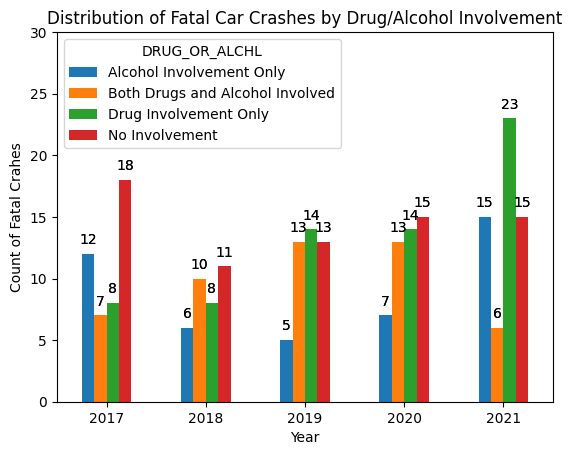

In [461]:
# Drug or Alcohol Involvement

fatal_crashes['DRUG_OR_ALCHL'] = fatal_crashes.apply(lambda row: 'No Involvement' if row['ALCHL_INVLV_FLG'] == 0 and row['DRUG_INVLV_FLG'] == 0 else
                                                                 'Drug Involvement Only' if row['ALCHL_INVLV_FLG'] == 0 and row['DRUG_INVLV_FLG'] == 1 else
                                                                 'Alcohol Involvement Only' if row['ALCHL_INVLV_FLG'] == 1 and row['DRUG_INVLV_FLG'] == 0 else
                                                                 'Both Drugs and Alcohol Involved', axis=1)

fatal_da = pd.crosstab(fatal_crashes['CRASH_YR_NO'], fatal_crashes['DRUG_OR_ALCHL'])

fatal_da_plot = fatal_da.plot(kind = "bar", rot = 0)
fatal_da_plot.set_ylim(0, 30)

# Adding data labels
for p in fatal_da_plot.patches:
    
    fatal_da_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    fatal_da_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Year")
plt.ylabel("Count of Fatal Crahes")
plt.title("Distribution of Fatal Car Crashes by Drug/Alcohol Involvement")
plt.show()

In [462]:
fatal_da['Involvement Ratio'] = 1 - (fatal_da['No Involvement'] /  fatal_da.sum(axis=1))
fatal_da

DRUG_OR_ALCHL,Alcohol Involvement Only,Both Drugs and Alcohol Involved,Drug Involvement Only,No Involvement,Involvement Ratio
CRASH_YR_NO,,,,,
2017,12,7,8,18,0.600000
2018,6,10,8,11,0.685714
2019,5,13,14,13,0.711111
2020,7,13,14,15,0.693878
2021,15,6,23,15,0.745763


K Means Clustering for Drug and Alcohol Involvement, crashes from 2017-2021

In [475]:
from sklearn.cluster import KMeans

yrs = crashes_portland[crashes_portland['CRASH_YR_NO'].isin(range(2017, 2022))]
features = yrs[['LAT_DD', 'LONGTD_DD', 'DRUG_INVLV_FLG', 'ALCHL_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG']]

kmeans = KMeans(n_clusters = 150, random_state = 42)
y_pred = kmeans.fit_predict(features[['LAT_DD', 'LONGTD_DD']])
features['cluster'] = y_pred

C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thoma\AppData\Local\Temp\ipykernel_10572\3515541851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = y_pred


Text(0, 0.5, 'Latitude')

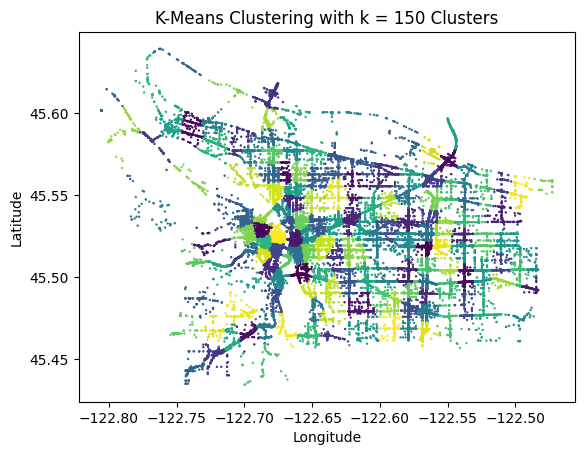

In [474]:
plt.scatter(features['LONGTD_DD'], features['LAT_DD'], s = 0.5, c = features['cluster'])
plt.title("K-Means Clustering with k = 150 Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Visually speaking, you can see that the centers of each clusters tend to be around intersections.  If we can identify intersections that have high rates of drug or alcohol use, then we can target those intersections/areas in terms of prevention programs and whatnot.

In [425]:
# Cluster Analysis

cluster_counts_drug = features.groupby(['cluster', 'DRUG_INVLV_FLG']).size().unstack().fillna(0)
cluster_proportions_drug = cluster_counts_drug.div(cluster_counts_drug.sum(axis=1), axis=0)

cluster_counts_alchl = features.groupby(['cluster', 'ALCHL_INVLV_FLG']).size().unstack().fillna(0)
cluster_proportions_alchl = cluster_counts_alchl.div(cluster_counts_alchl.sum(axis=1), axis=0)

print(cluster_proportions_drug.sort_values(by = 1.0))
print(cluster_proportions_alchl.sort_values(by = 1.0))

DRUG_INVLV_FLG       0.0       1.0
cluster                           
0               1.000000  0.000000
49              1.000000  0.000000
35              1.000000  0.000000
55              1.000000  0.000000
56              1.000000  0.000000
...                  ...       ...
65              0.973568  0.026432
10              0.959184  0.040816
21              0.950000  0.050000
8               0.940299  0.059701
139             0.920000  0.080000

[150 rows x 2 columns]
ALCHL_INVLV_FLG       0.0       1.0
cluster                            
108              1.000000  0.000000
144              1.000000  0.000000
35               0.994565  0.005435
84               0.992337  0.007663
4                0.989583  0.010417
...                   ...       ...
54               0.902222  0.097778
120              0.897810  0.102190
8                0.895522  0.104478
125              0.891089  0.108911
56               0.885714  0.114286

[150 rows x 2 columns]


In [430]:
high_concentration_clusters_drug = cluster_proportions_drug[1.0] > 0.025  # Define a threshold
high_concentration_cluster_ids_drug = high_concentration_clusters_drug[high_concentration_clusters_drug].index
high_concentration_clusters_alchl = cluster_proportions_alchl[1.0] > 0.1  # Define a threshold
high_concentration_cluster_ids_alchl = high_concentration_clusters_alchl[high_concentration_clusters_alchl].index

print(high_concentration_cluster_ids_drug)
print(high_concentration_cluster_ids_alchl)

Index([8, 10, 21, 65, 92, 116, 139], dtype='int32', name='cluster')
Index([8, 56, 120, 125], dtype='int32', name='cluster')


Next steps:  Making prettier visualizations for the clusters that are high concentration of drug/alcohol related crashes (cluster 8 in particular)

In [ ]:
# Elbow Method (May not be necessary, but the code is here nonetheless)

"""
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

# Try different values of k
K = range(1, 100)

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(drug)

    distortions.append(sum(np.min(cdist(drug, kmeans.cluster_centers_, 'euclidean'), axis=1)) / drug.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[k] = sum(np.min(cdist(drug, kmeans.cluster_centers_, 'euclidean'), axis=1)) / drug.shape[0]
    mapping2[k] = kmeans.inertia_

# Plot the elbow curve
plt.plot(K, distortions, 'bx-', label='Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k (Distortion)')
plt.show()
"""